<h1>Hypothesis: "Antartic locations with subterrainian lake will have flatter surafce ice slopes"</h1>

Data Used:
    lakes:
        https://nsidc.org/data/nsidc-0523/versions/1 (this is massive)

        https://www.npolar.no/quantarctica/#toggle-id-15 
        wright & siegert
        blankenship
        smith
        bell (recovery)
        studinger (vostok)
        optional: flux Le Brocq

    slopes:
        https://www.bas.ac.uk/project/bedmap-2/#data
        https://www.pgc.umn.edu/data/rema/
    
    support:
        https://usicecenter.gov/Products/AntarcData "Weekly Antartic Shapefile"
        https://www.npolar.no/quantarctica/ (this has mostly everything)
        https://www.bas.ac.uk/data/our-data/data-systems/

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import rioxarray as xrio
import contextily as ctx
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

<Axes: >

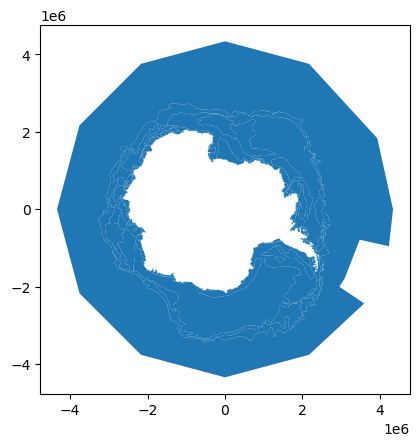

In [2]:
shapefile_path = 'data\\antarc241115\ANTARC241115.shp'
gdf = gpd.read_file(shapefile_path)
gdf.plot()

In [3]:
print(type(gdf))
gdf

<class 'geopandas.geodataframe.GeoDataFrame'>


,CT,CA,CB,CC,SO,SA,SB,SC,SD,FA,FB,FC,FS,FP,ICECODE,POLY_TYPE,Shape_Leng,Shape_Area,geometry
0,00,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,CT00CA-9-9-9CB-9-9-9CC-9-9-9CF-9-9CN-9CD-9,W,5.520622e+07,2.771760e+13,"POLYGON ((2169942.781 3758451.156, 3933272.094..."
1,13,-9,-9,-9,98,86,-9,-9,-9,-9,-9,-9,-9,-9,CT13CA-986-9CB-9-9-9CC-9-9-9CF-9-9CN98CD-9,I,1.021520e+06,1.638804e+10,"POLYGON ((-563727.446 -3332354.893, -572121.63..."
2,13,-9,-9,-9,98,86,-9,-9,-9,-9,-9,-9,-9,-9,CT13CA-986-9CB-9-9-9CC-9-9-9CF-9-9CN98CD-9,I,5.263802e+05,3.644714e+09,"POLYGON ((2220492.5 -840149.668, 2220944.923 -..."
3,13,-9,-9,-9,98,86,-9,-9,-9,-9,-9,-9,-9,-9,CT13CA-986-9CB-9-9-9CC-9-9-9CF-9-9CN98CD-9,I,6.635708e+06,1.216410e+11,"POLYGON ((2568905.293 -685088.448, 2571124.879..."
4,13,-9,-9,-9,98,86,-9,-9,-9,-9,-9,-9,-9,-9,CT13CA-986-9CB-9-9-9CC-9-9-9CF-9-9CN98CD-9,I,4.403055e+05,4.590068e+09,"POLYGON ((2127519.556 -742200.07, 2118697.306 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,92,10,90,-9,-9,98,95,-9,-9,-9,-9,-9,-9,08,CT92CA1098-9CB9095-9CC-9-9-9CF08-9CN-9CD-9,I,1.300501e+06,1.292010e+10,"POLYGON ((-1900875.743 1502126.812, -1902653.7..."
166,92,10,90,-9,-9,98,95,-9,-9,-9,-9,-9,-9,08,CT92CA1098-9CB9095-9CC-9-9-9CF08-9CN-9CD-9,I,3.173670e+05,1.712026e+09,"POLYGON ((-358272.532 1693799.95, -357280.343 ..."
167,92,10,90,-9,-9,98,95,-9,-9,-9,-9,-9,-9,08,CT92CA1098-9CB9095-9CC-9-9-9CF08-9CN-9CD-9,I,5.939246e+05,1.063043e+10,"POLYGON ((-1744303.065 1864124.491, -1725569.9..."
168,92,10,90,-9,-9,98,95,-9,-9,-9,-9,-9,-9,08,CT92CA1098-9CB9095-9CC-9-9-9CF08-9CN-9CD-9,I,1.450039e+06,1.791794e+10,"POLYGON ((-752589.019 2061331.717, -748499.198..."


In [4]:
gdf.crs

<Projected CRS: PROJCS["WGS_1984_Stereographic_South_Pole",GEOGCS[ ...>
Name: WGS_1984_Stereographic_South_Pole
Axis Info [cartesian]:
- [north]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Polar Stereographic (variant B)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

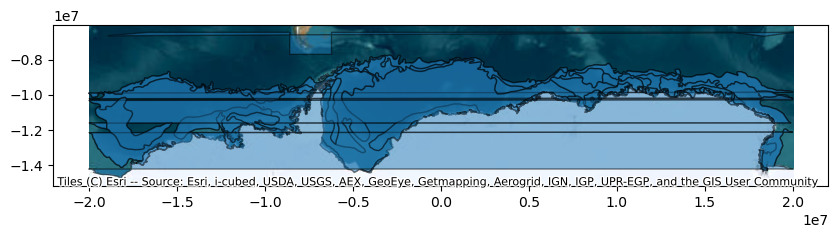

In [5]:
# Reproject to Web Mercator (EPSG:3857) for compatibility with basemaps
gdf_web_mercator = gdf.to_crs("EPSG:3857")

# Plot
ax = gdf_web_mercator.plot(figsize=(10, 10), edgecolor="k", alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)
plt.show()

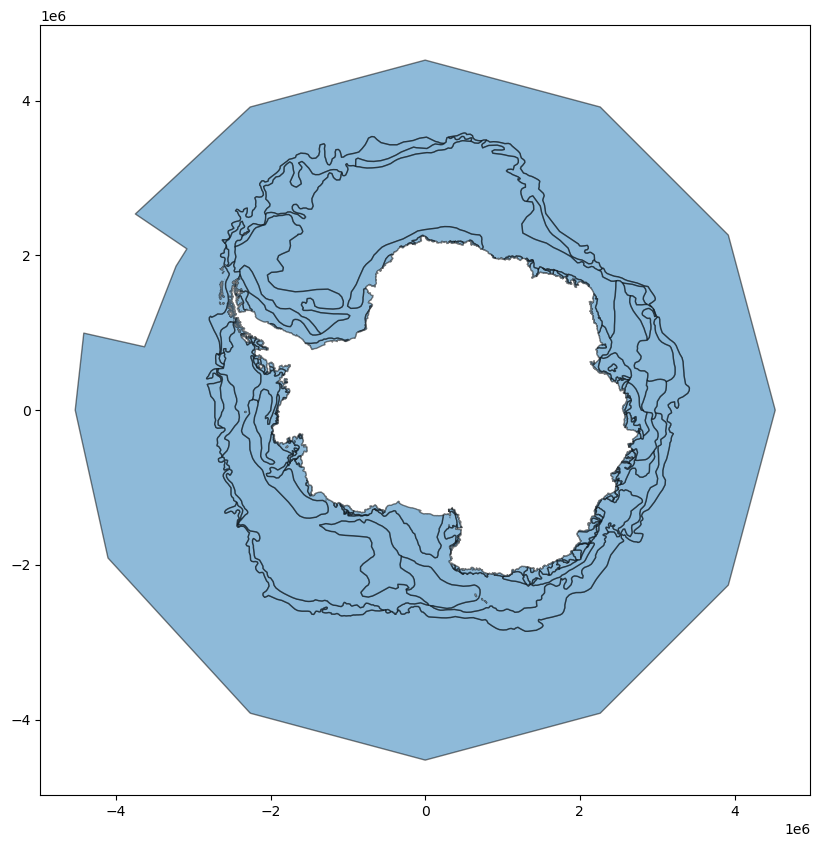

In [6]:
fixed = gdf_web_mercator.to_crs("EPSG:3031")
ax = fixed.plot(figsize=(10, 10), edgecolor="k", alpha=0.5)

In [7]:
# Load Antarctic subglacial lakes
lakes = pd.read_csv('data/lakes/subglacial_lakes_2012update.csv', encoding='latin1')
lakes.rename(columns={'Lat.         oN': 'Latitude', 'Lon.       oE': 'Longitude'}, inplace=True)
lakes_gdf = gpd.GeoDataFrame(lakes, geometry=gpd.points_from_xy(lakes['Longitude'], lakes['Latitude']))

# Set lakes CRS to WGS84 (EPSG:4326) and transform to Antarctic Polar Stereographic (EPSG:3031)
lakes_gdf.set_crs(epsg=4326, inplace=True)
lakes_gdf = lakes_gdf.to_crs(epsg=3031)

# Load Antarctic shapefile and transform to EPSG:3031
world = gpd.read_file('data/antarc241115/ANTARC241115.shp')
world = world.to_crs(epsg=3031)

# Plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.SouthPolarStereo()})
world.boundary.plot(ax=ax, transform=ccrs.SouthPolarStereo(), linewidth=0.8, color='blue')
lakes_gdf.plot(ax=ax, cmap='viridis', column='Ice thickness m', legend=True, 
               legend_kwds={'label': "Ice Thickness (m)"}, transform=ccrs.SouthPolarStereo())

# Adjust map extent if needed
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())  # Adjust bounds for rotation

plt.title("Antarctic Subglacial Lakes with Ice Thickness 2024")
plt.show()

NameError: name 'pd' is not defined

spacing

<h2>bedmaps</h2>

<h4>Surface Height</h4>

In [ ]:
surface_tif_path = 'data\\bedmap2_tiff\\bedmap2_surface.tif'
surface_xr = xrio.open_rasterio(surface_tif_path)

surface_xr

<xarray.DataArray (band: 1, y: 6667, x: 6667)> Size: 89MB
[44448889 values with dtype=int16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 53kB -3.333e+06 -3.332e+06 ... 3.332e+06 3.333e+06
  * y            (y) float64 53kB 3.333e+06 3.332e+06 ... -3.332e+06 -3.333e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  4082
    STATISTICS_MEAN:     1964.5365528824
    STATISTICS_MINIMUM:  1
    STATISTICS_STDDEV:   1172.5307214673
    _FillValue:          32767
    scale_factor:        1.0
    add_offset:          0.0

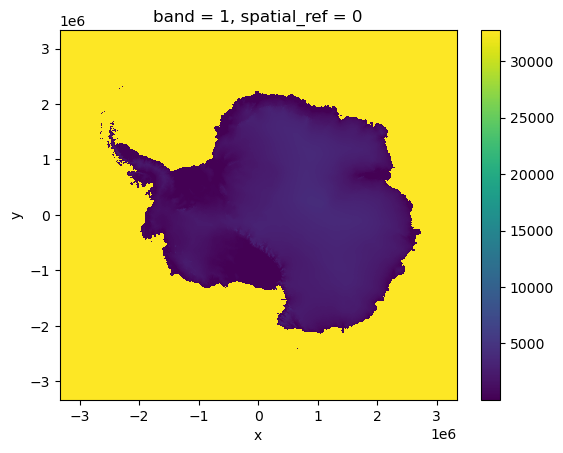

In [ ]:
surface_xr.plot()

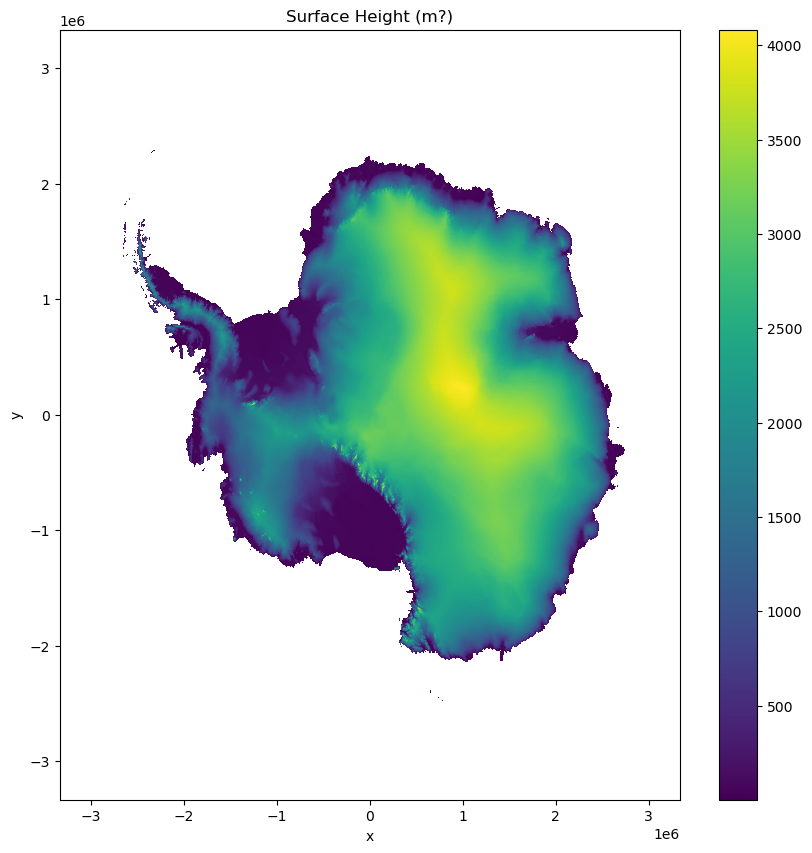

In [ ]:
#Better plot

surface_xr_masked = surface_xr.where(surface_xr != 32767)

surface_xr_masked.plot(figsize=(10, 10), cmap='viridis')
plt.title("Surface Height (m?)")
# plt.colorbar(label='Pixel Values')
plt.show()


<h4>Ice Thickness</h4>

In [ ]:
thickness_tif_path = 'data\\bedmap2_tiff\\bedmap2_thickness.tif'
thickness_xr = xrio.open_rasterio(thickness_tif_path)

thickness_xr

<xarray.DataArray (band: 1, y: 6667, x: 6667)> Size: 89MB
[44448889 values with dtype=int16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 53kB -3.333e+06 -3.332e+06 ... 3.332e+06 3.333e+06
  * y            (y) float64 53kB 3.333e+06 3.332e+06 ... -3.332e+06 -3.333e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  4621
    STATISTICS_MEAN:     1926.6438367784
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   1052.6332469716
    _FillValue:          32767
    scale_factor:        1.0
    add_offset:          0.0

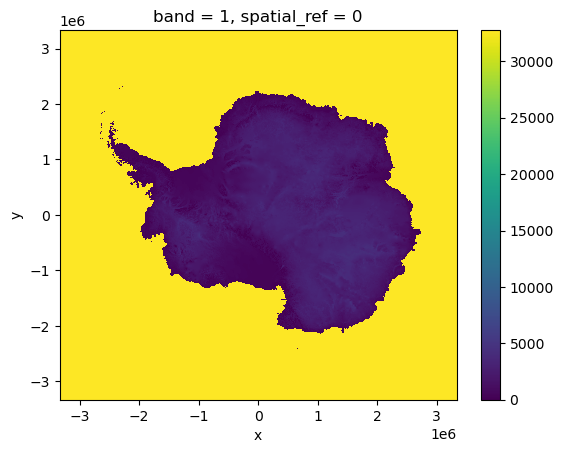

In [ ]:
thickness_xr.plot()

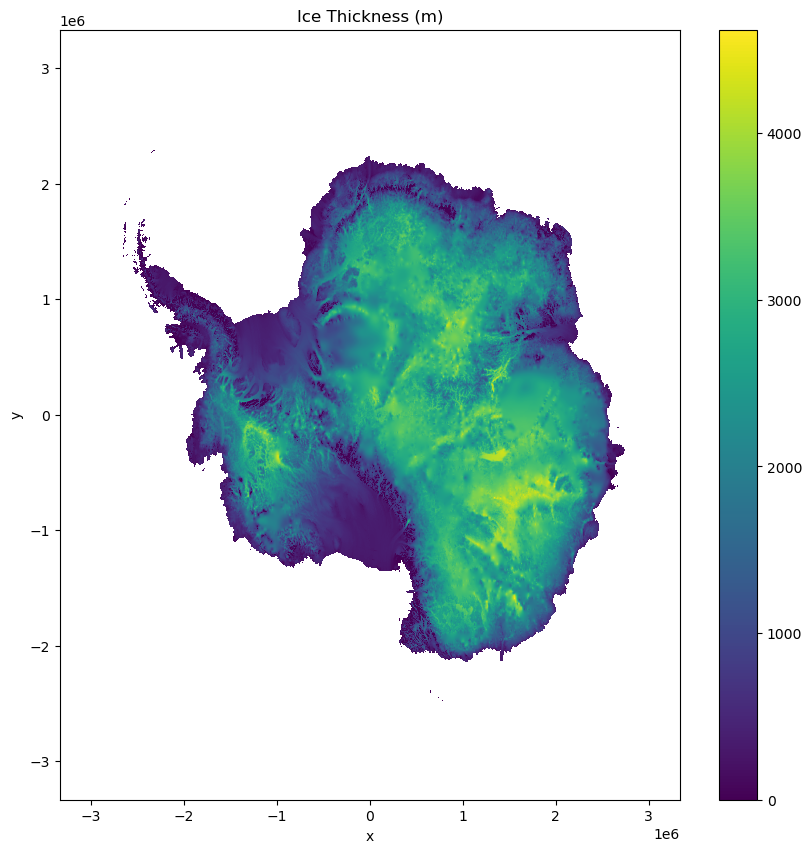

In [ ]:
#Better plot

thickness_xr_masked = thickness_xr.where(thickness_xr != 32767)

thickness_xr_masked.plot(figsize=(10, 10), cmap='viridis')
plt.title("Ice Thickness (m)")
# plt.colorbar(label='Pixel Values')
plt.show()


<h4>Digital Elevation Model (DEM)</h4>

In [ ]:
dem_path = 'data\dem\RCbRT8Dd.tiff'

dem_xr = xrio.open_rasterio(dem_path)
dem_xr

<xarray.DataArray (band: 1, y: 884, x: 979)> Size: 3MB
[865436 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 8kB -3.393e+06 -3.385e+06 ... 3.907e+06 3.914e+06
  * y            (y) float64 7kB 3.156e+06 3.149e+06 ... -3.433e+06 -3.441e+06
    spatial_ref  int64 8B 0
Attributes:
    DataType:         Generic
    AREA_OR_POINT:    Area
    SourceBandIndex:  0
    _FillValue:       -9999.0
    scale_factor:     1.0
    add_offset:       0.0

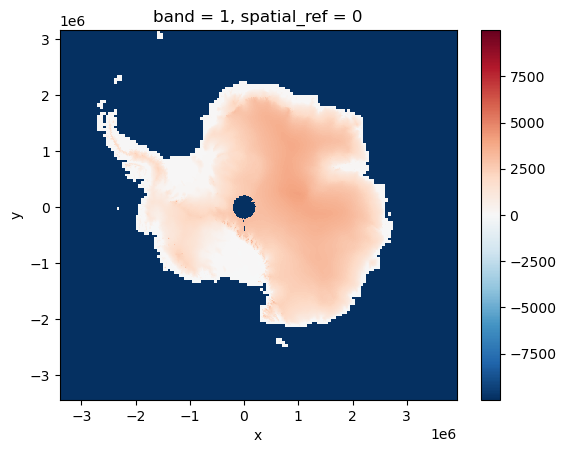

In [ ]:
dem_xr.plot()

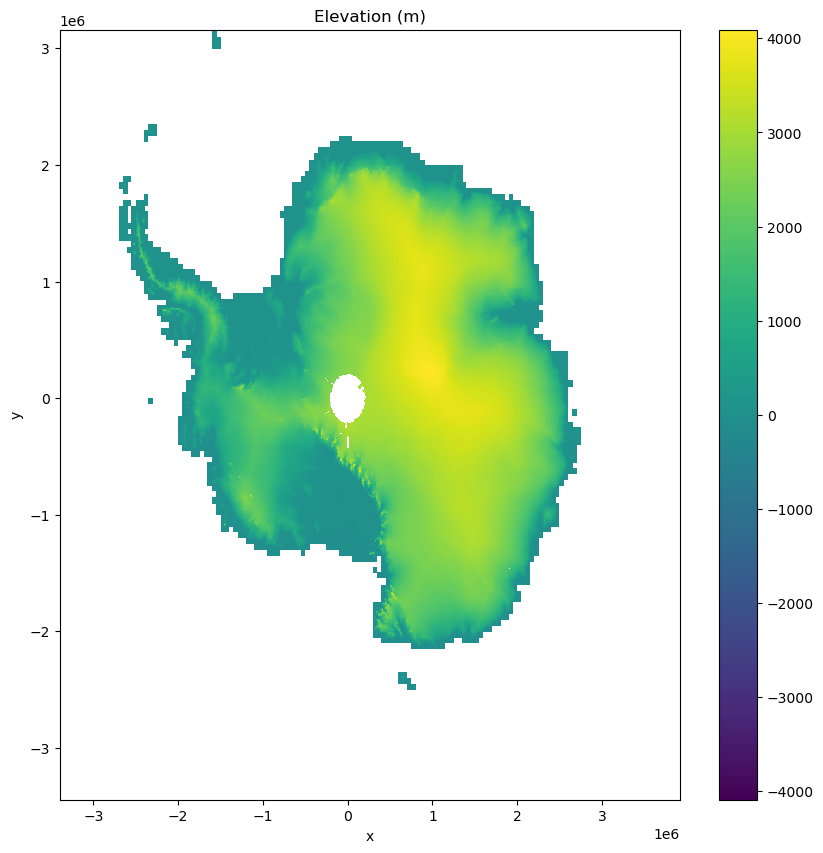

In [ ]:
#Better plot

dem_xr_masked = dem_xr.where(dem_xr != -9999)

dem_xr_masked.plot(figsize=(10, 10), cmap='viridis')
plt.title("Elevation (m)")
# plt.colorbar(label='Pixel Values')
plt.show()